<a href="https://colab.research.google.com/github/asu-trans-ai-lab/gmns_education_data_sets/blob/main/plot2gmns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: load the OSM file from the repository of OSM testing datasets**

In [1]:
!rm -rf ./osm_test_data_set/
!git clone https://github.com/asu-trans-ai-lab/osm_test_data_set

%cd osm_test_data_set

Cloning into 'osm_test_data_set'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 304 (delta 10), reused 0 (delta 0), pack-reused 281
Receiving objects: 100% (304/304), 150.29 MiB | 21.14 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (79/79), done.
/content/osm_test_data_set


Check the file icon on the left hand side, makesure file map.osm exists.

**Step 1: install python packages**

In [2]:
!pip install osm2gmns



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.6 MB/s 
     |████████████████████████████████| 1.3 MB 36.1 MB/s 


**Step 2: convert OSM to GMNS Files**

         Please use getNetFromFile().
arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: all
  POI: True
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs
  number of nodes: 823, number of links: 1614, number of pois: 1256
Generating Node Activity Information
Consolidating Complex Intersections
Outputting Network Files
Outputting Network Files


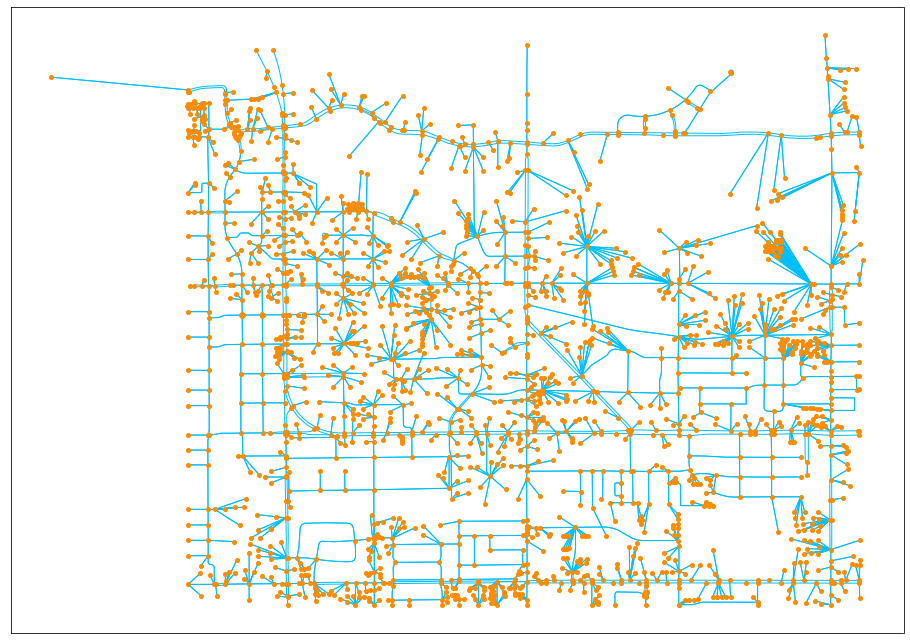

Figure is saved to network.jpg


In [4]:
import osm2gmns as og
net = og.getNetFromOSMFile('map.osm', POI=True)
og.connectPOIWithNet(net)
og.generateNodeActivityInfo(net)
og.consolidateComplexIntersections(net)
og.outputNetToCSV(net, output_folder='consolidated')
og.outputNetToCSV(net)
og.show(net)
og.saveFig(net)

Check node.csv, link.csv and poi.csv exist in the left-hand-side Colab folder.

**Step 3: Run grid2demand to generate demand based POI rates**

In [7]:
!pip install plot4gmns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import plot4gmns as pg

"Step1: read input network data"
net=pg.readNetwork('')
net.get_avl_node_attrs()
net.get_avl_link_attrs()

attr                          type                
ctrl_type                     int                 
activity_type                 str                 
production                    float               
attraction                    float               
attr                          type                
length                        float               
lanes                         int                 
free_speed                    float               
capacity                      float               
link_type_name                str                 
allowed_uses                  str                 


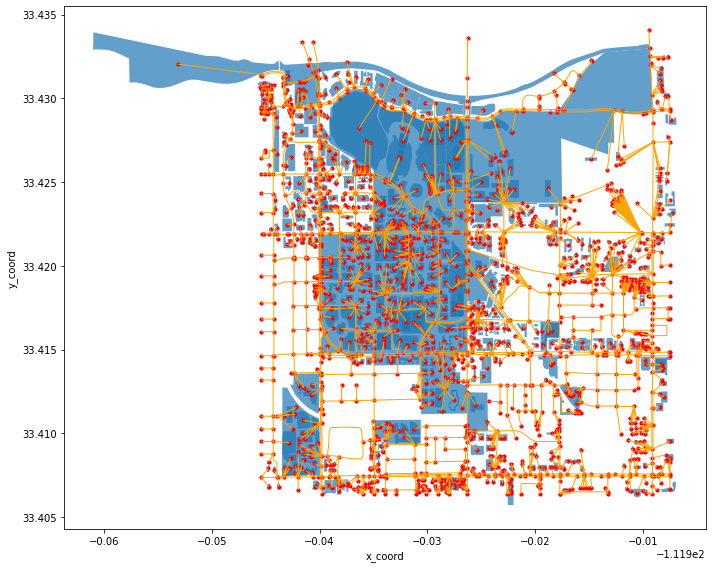

In [13]:
pg.showNetByAllMode(net)

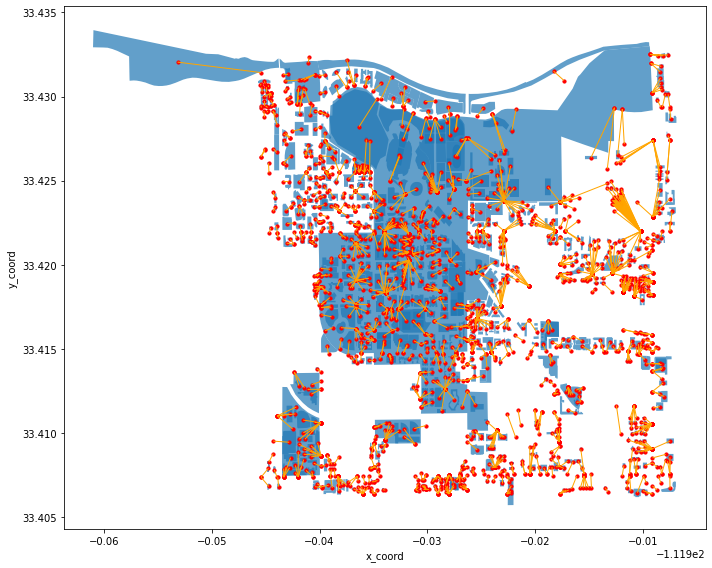

In [14]:
pg.showNetByBikeMode(net)

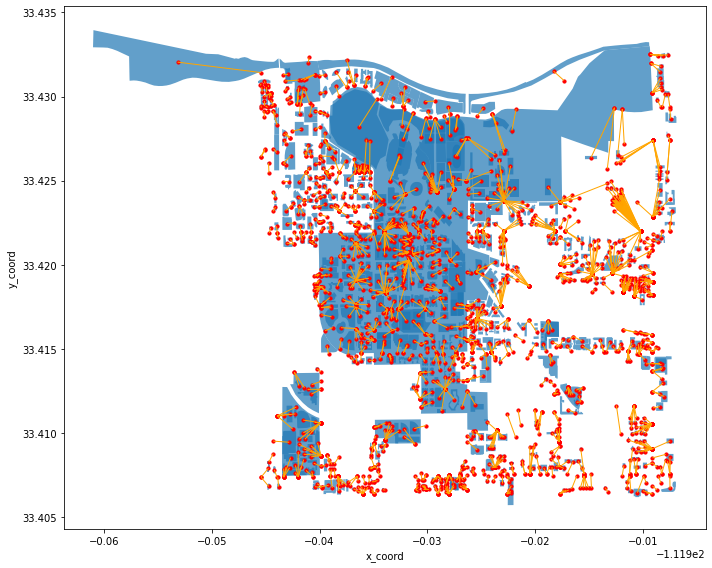

In [15]:
pg.showNetByWalkMode(net)

In [16]:
pg.showNetByRailMode(net)

error! rail mode not found in the link.csv


In [17]:
pg.showNetByNodeAttr(net,{'ctrl_type':1})

 'ctrl_type=1' values not found


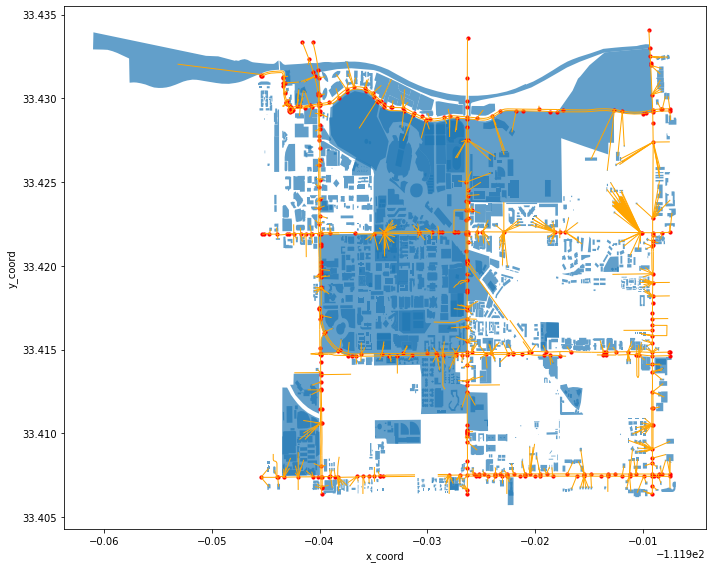

In [18]:
pg.showNetByNodeAttr(net,{'activity_type':['primary', 'secondary']})

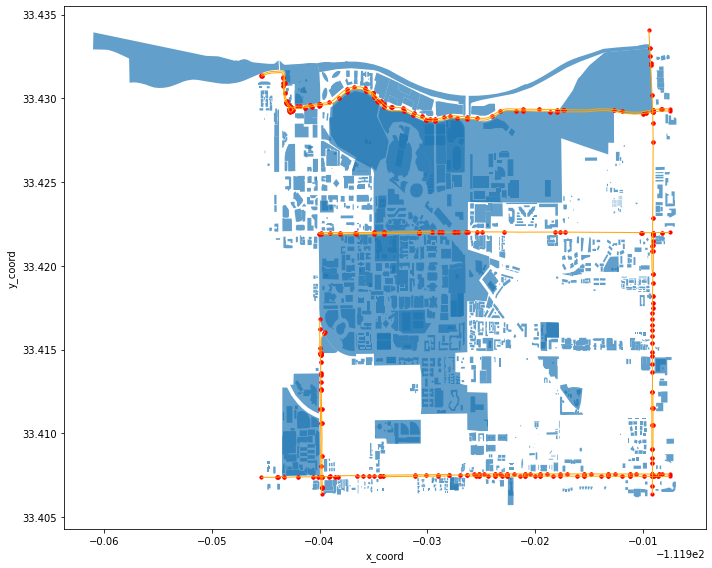

In [19]:
pg.showNetByLinkAttr(net,{'link_type_name':'secondary'})

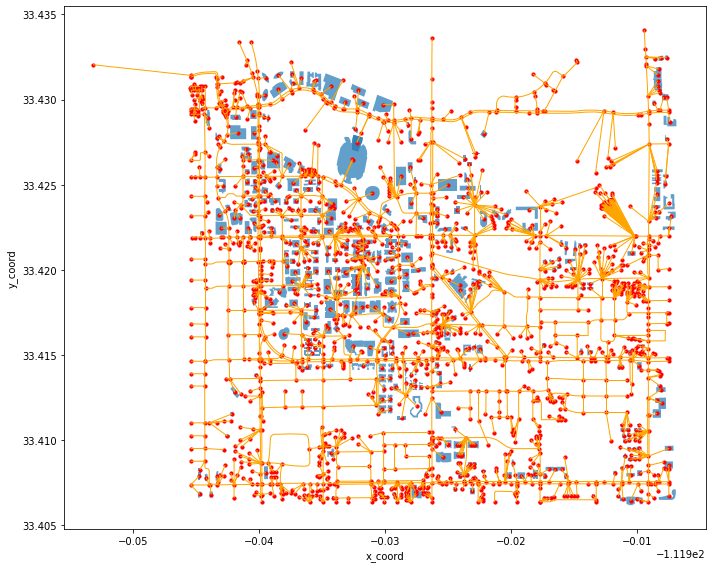

In [20]:
pg.showNetByPOIAttr(net,{'building':'yes'})

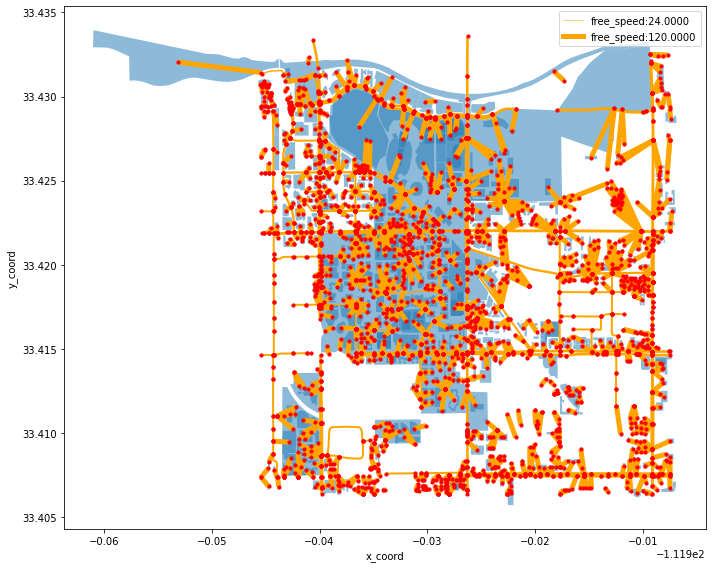

In [21]:
pg.showNetByLinkFreeSpeed(net)

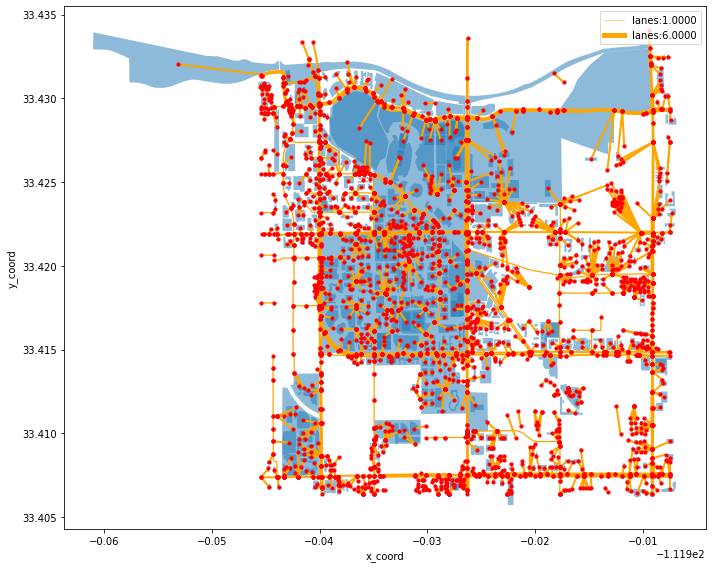

In [22]:
pg.showNetByLinkLaneNum(net)

In [23]:
pg.showNetByLinkCapacity(net)

link capacity values not found


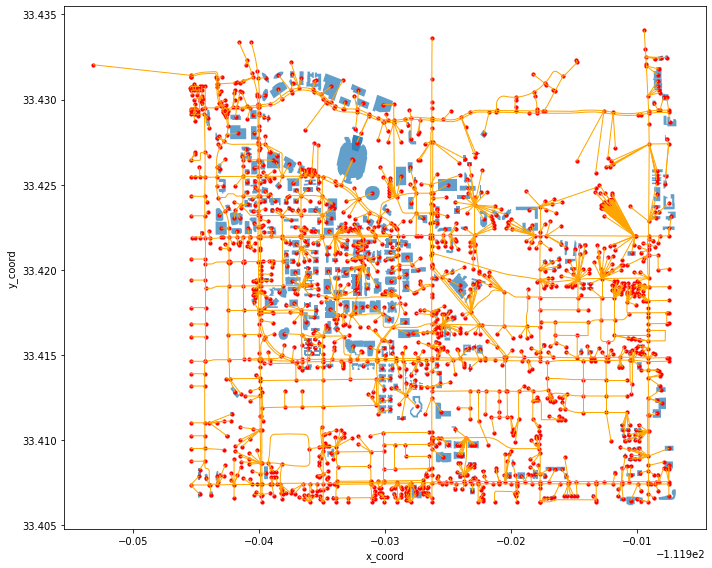

In [24]:
pg.showNetByPOIAttr(net,{'building':['office', 'yes']})

In [25]:
pg.showNetByPOIAttr(net,{'activity_zone_id':(1,5)})

'<=' not supported between instances of 'str' and 'int'
 'activity_zone_id=(1, 5)' values not found


In [27]:
pg.showNetByZoneDemandHeatMap(net)

zone demand volume information not found, please check demand.csv


**Step 4: Download data files**



In [ ]:
% cd ../
!zip -r /content/osm_test_data_set/map.zip /content/osm_test_data_set/


/content/osm_test_data_set/datasets/osm_test_data_set
  adding: content/osm_test_data_set/ (stored 0%)
  adding: content/osm_test_data_set/doc/ (stored 0%)
  adding: content/osm_test_data_set/doc/Lecture Network Design for Accessibility.pptx (deflated 5%)
  adding: content/osm_test_data_set/doc/accessibility in practice.pptx.pptx (deflated 2%)
  adding: content/osm_test_data_set/doc/Accessibility - ACSP 2015.pptx (deflated 10%)
  adding: content/osm_test_data_set/test_gtfs.ipynb (deflated 68%)
  adding: content/osm_test_data_set/README.md (stored 0%)
  adding: content/osm_test_data_set/.git/ (stored 0%)
  adding: content/osm_test_data_set/.git/HEAD (stored 0%)
  adding: content/osm_test_data_set/.git/index (deflated 45%)
  adding: content/osm_test_data_set/.git/info/ (stored 0%)
  adding: content/osm_test_data_set/.git/info/exclude (deflated 28%)
  adding: content/osm_test_data_set/.git/logs/ (stored 0%)
  adding: content/osm_test_data_set/.git/logs/HEAD (deflated 29%)
  adding: conten

In [ ]:
from google.colab import files
files.download("/content/osm_test_data_set/map.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 5: Visualization using GMNS tool:**
By simply uploading node.csv and link.csv at https://asu-trans-ai-lab.github.io/index.html#,  
 you can easily create custom online maps for any GMNS network files. 
To view zone and demand information please visit this page to use QGIS/NeXTA tools. https://github.com/asu-trans-ai-lab/traffic-engineering-and-analysis/blob/master/undergraduate_student_project/QGIS%20For%20Gmns%20User%20Guide_v0.5.pdf 

**Option for downloading OSM map.osm file for the area of interest**

On OpenStreetMap homepage, click the Export button to enter Export mode. Before downloading, you may need to span and zoom in/out the map to make sure that your target area is properly shown on the screen. Or, you can use Manually select a different area to select your area more precisely. Click the Export button in blue to export the network you want.

Note that if the target area is too large, you may get an error message: “You requested too many nodes (limit is 50000). Either request a smaller area, or use planet.osm”. In this case, you can always click Overpass API to download the network you need via a mirror site.

You can uploda the file as shown below to Google Colab environment and repeat from step 2 of running OSM2GMNS to step 5



In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

